# Import and startup

In [1]:
from UTILITY_quickstart import *

In [2]:
with open("./impact/distgen.yaml") as fid:
    input = yaml.safe_load(fid)

print(input)

{'species': 'electron', 'n_particle': 1000000, 'random_type': 'hammersley', 'start': {'type': 'cathode', 'MTE': {'value': 400, 'units': 'meV'}}, 'total_charge': {'value': 1600, 'units': 'pC'}, 'xy_dist': {'type': 'file2d', 'file': 'VCC.jpeg', 'max_x': {'value': 2.808, 'units': 'mm'}, 'max_y': {'value': 2.808, 'units': 'mm'}, 'min_x': {'value': -2.808, 'units': 'mm'}, 'min_y': {'value': -2.808, 'units': 'mm'}}, 't_dist': {'type': 'gaussian', 'avg_t': {'units': 'ps', 'value': 0}, 'sigma_t': {'units': 'ps', 'value': 1.17}, 'n_sigma_cutoff': 3}}


In [3]:
tao = initializeTao(
    inputBeamFilePathSuffix = '/beams/2024-10-22_Impact_OneBunch/2024-10-22_oneBunch.h5',
    # defaultsFile = "setLattice_defaults_2024-08-21_demo.yml",
    # csrTF = True,
    #numMacroParticles = 1e3,
    loadDefaultLatticeTF = False
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Not using setLattice(). Golden lattice
Number of macro particles defined by input file


In [4]:
tao.cmd("show ele CN2069 -all")

['Element # 1308',
 'Element Name: CN2069',
 'Element Type:  "notch"',
 'Key: Rcollimator',
 'S_start, S:    937.077555,    937.077555',
 'Ref_time_start, Ref_time:  3.125771E-06,  3.125771E-06',
 '',
 'Attribute values:',
 '    1  L                           =  0.0000000E+00 m',
 '    2  TILT                        =  0.0000000E+00 rad      60  TILT_TOT                    =  0.0000000E+00 rad',
 '   10  FRINGE_TYPE                 =  None (1)               11  FRINGE_AT                   =  Both_Ends (3)',
 '   13  SPIN_FRINGE_ON              =  T (1)',
 '   17  STATIC_LINEAR_MAP           =  F (0)',
 '   24  PX_APERTURE_WIDTH2          =  0.0000000E+00          25  PX_APERTURE_CENTER          =  0.0000000E+00',
 '   26  PY_APERTURE_WIDTH2          =  0.0000000E+00          27  PY_APERTURE_CENTER          =  0.0000000E+00',
 '   28  Z_APERTURE_WIDTH2           =  0.0000000E+00 m        29  Z_APERTURE_CENTER           =  0.0000000E+00 m',
 '   30  PZ_APERTURE_WIDTH2          =  0.00000

In [5]:
tao.lat_list(1308,"ele.a.eta")

array([0.08480446])

In [6]:
tao.lat_list(1308,"ele.x.eta")

array([0.08480446])

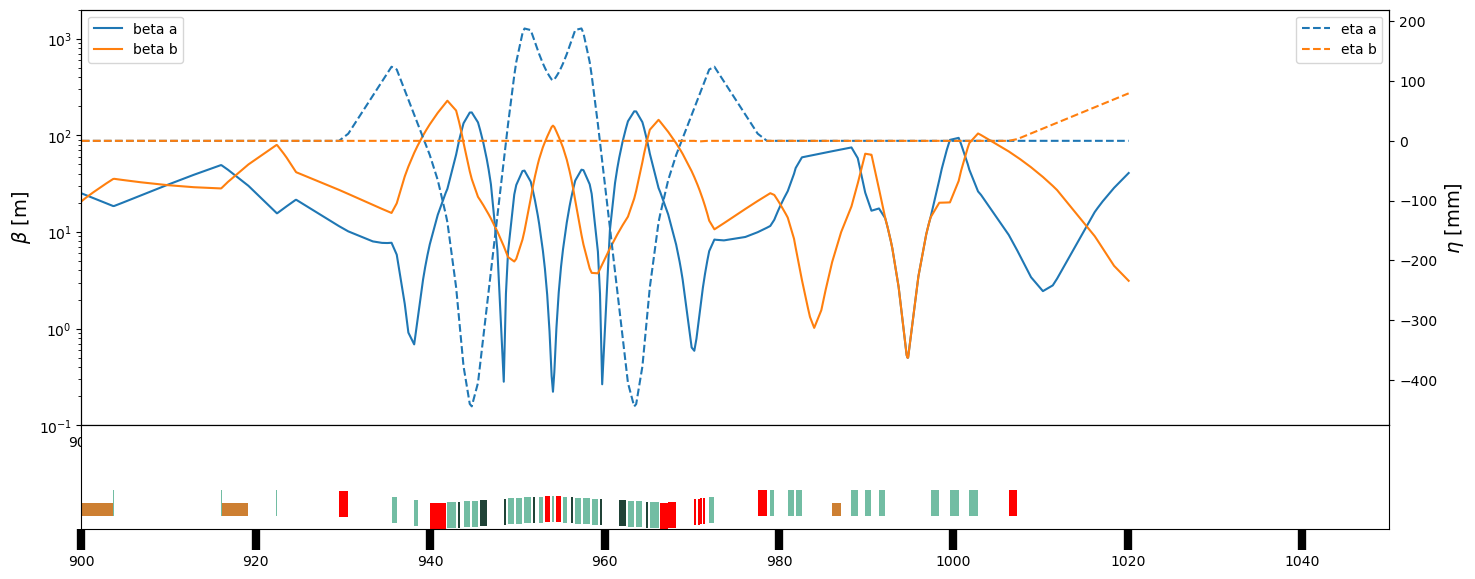

In [11]:
floorplanPlot(tao,
              zmin = 900,
              zmax = 1050,
              ymin = 0.1,
              ymax = 2e3
             )

In [8]:
tao.cmd("show ele PR10571 -all")

['Element # 124',
 'Element Name: PR10571',
 'Element Type:  "OTR"',
 'Element Alias:  "OTRS:IN10:571"',
 'Key: Monitor',
 'S_start, S:     14.236682,     14.236682',
 'Ref_time_start, Ref_time:  4.750495E-08,  4.750495E-08',
 '',
 'Attribute values:',
 '    1  L                           =  0.0000000E+00 m',
 '    2  TILT                        =  0.0000000E+00 rad      60  TILT_TOT                    =  0.0000000E+00 rad',
 '    3  X_GAIN_ERR                  =  0.0000000E+00 m         4  Y_GAIN_ERR                  =  0.0000000E+00 m',
 '    5  CRUNCH                      =  0.0000000E+00 rad      21  CRUNCH_CALIB                =  0.0000000E+00 rad',
 '    6  NOISE                       =  0.0000000E+00          26  N_SAMPLE                    =  0.0000000E+00',
 '    7  OSC_AMPLITUDE               =  0.0000000E+00 m',
 '    8  X_GAIN_CALIB                =  0.0000000E+00 m        20  Y_GAIN_CALIB                =  0.0000000E+00 m',
 '   10  FRINGE_TYPE                 =  None (1) 

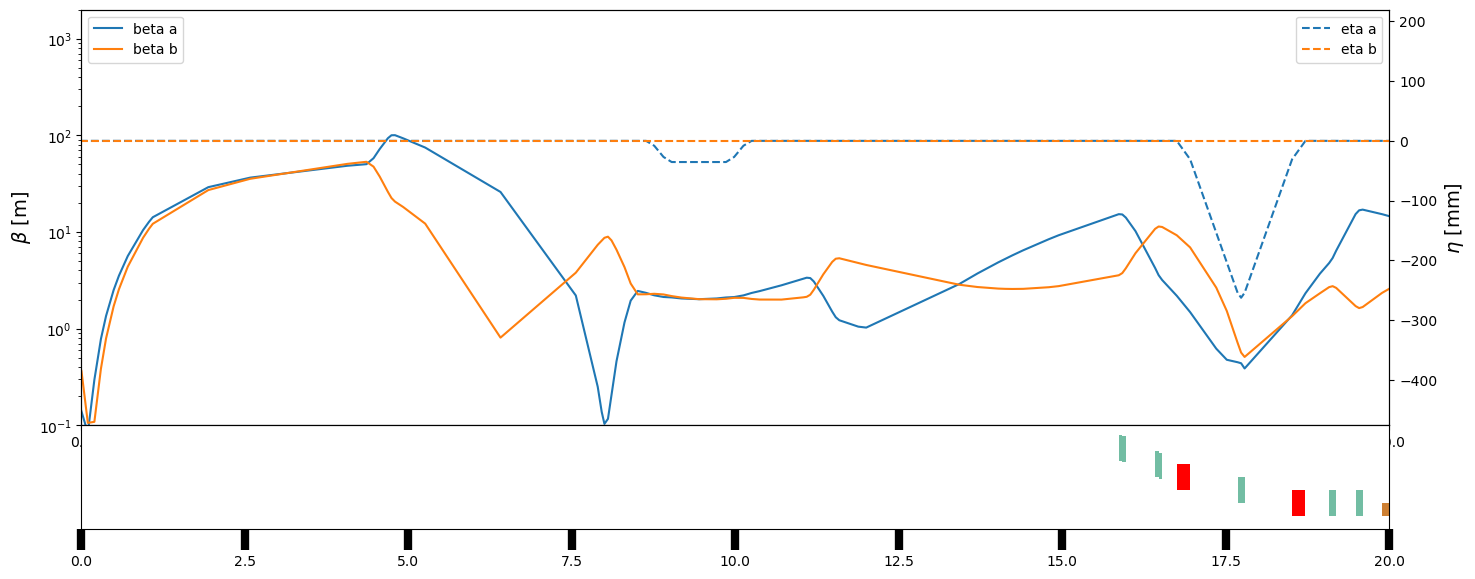

In [10]:
floorplanPlot(tao,
              zmin = 0,
              zmax = 20,
              ymin = 0.1,
              ymax = 2e3
             )

In [10]:
elements=tao.lat_ele_list();


floorplan=pd.read_csv(
    io.StringIO('\n'.join(tao.show('lat -all -floor_coords -tracking_elements')[3:-5])), 
    sep="[\s\n]+",
    engine='python',
    names=['Index','ElementName','ElementType','s','ds','X','Y','Z','Theta','Phi','Psi'])
floorplan.drop(0,inplace=True)

#Get twiss functions
tao.cmd('set global lattice_calc_on = T')
s=np.array([tao.lat_list(x,'ele.s')[0] for x in floorplan.Index])
x=np.array([tao.lat_list(x,'orbit.floor.x')[0] for x in floorplan.Index])
beta_y=np.array([tao.lat_list(x,'ele.a.beta')[0] for x in floorplan.Index])
beta_x=np.array([tao.lat_list(x,'ele.b.beta')[0] for x in floorplan.Index])
etot=np.array([tao.lat_list(x,'ele.e_tot')[0] for x in floorplan.Index])
eta_y=np.array([tao.lat_list(x,'ele.y.eta')[0] for x in floorplan.Index])
eta_x=np.array([tao.lat_list(x,'ele.x.eta')[0] for x in floorplan.Index])

In [11]:
P = ParticleGroup('./beams/2024-12-11_Impact_OneBunch/2024-12-11_oneBunch.h5')
P.twiss()
getBeamSpecs(P)

/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:445: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


{'PDrive_median_x': 1.12586926825712e-07,
 'PDrive_median_y': 1.3352662941861706e-07,
 'PDrive_median_xp': 4.0951378179747567e-08,
 'PDrive_median_yp': 4.002041024553142e-08,
 'PDrive_sigmaSI90_x': 0.0013296517737106967,
 'PDrive_sigmaSI90_y': 0.00132957879466964,
 'PDrive_sigmaSI90_z': 0.0005701257231078865,
 'PDrive_sigmaSI90_xp': 0.0003478643121193866,
 'PDrive_sigmaSI90_yp': 0.0003478473135332458,
 'PDrive_emitSI90_x': 2.705102631431173e-06,
 'PDrive_emitSI90_y': 2.7048771990300812e-06,
 'PDrive_norm_emit_x': 4.3310326953978076e-06,
 'PDrive_norm_emit_y': 4.330748564457102e-06,
 'PDrive_charge_nC': 1.5999999999999936}

In [5]:
getMatrix(tao, "BEGBC20", "M11E", print = True);

-0.679749,2.365588,-0.000000,-0.000000,0.000000,0.120094
-0.084842,-1.175874,-0.000000,-0.000000,0.000000,-0.022590
-0.000000,-0.000000,-0.048302,10.251117,0.000000,-0.000000
-0.000000,-0.000000,-0.094728,-0.599002,0.000000,-0.000000
-0.025545,-0.087776,0.000000,0.000000,1.000000,-0.006910
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [11]:
P["mean_t"]

1.380550590871644e-08

In [12]:
P["mean_z"]

4.127749772392207

In [ ]:
getMatrix(tao, "Q0FF", "M3EX", print = True);

In [6]:
tao.cmd("show lat MONITOR::* -att alias")

['# Values shown are for the Exit End of each Element:',
 '# Index  name     key                      s       l  alias',
 '     20  BPM10221 Monitor              0.699   0.000  BPMS:IN10:221',
 '     25  PR10241  Monitor              0.942   0.000  YAGS:IN10:241',
 '     46  BPM10371 Monitor              4.741   0.000  BPMS:IN10:371',
 '     69  BPM10425 Monitor              8.052   0.000  BPMS:IN10:425',
 '     83  PR10465  Monitor              9.107   0.000  OTRS:IN10:465',
 '     89  PR10471  Monitor              9.782   0.000  OTRS:IN10:471',
 '    102  BPM10511 Monitor             11.145   0.000  BPMS:IN10:511',
 '    109  BPM10525 Monitor             11.535   0.000  BPMS:IN10:525',
 '    124  PR10571  Monitor             14.237   0.000  OTRS:IN10:571',
 '    126  BPM10581 Monitor             14.402   0.000  BPMS:IN10:581',
 '    130  BZ10596  Monitor             14.943   0.000  BLEN:IN10:596',
 '    133  BPM10631 Monitor             15.917   0.000  BPMS:IN10:631',
 '    140  BPM1

In [44]:
tao.cmd("show ele M1FF")

['Element # 1471',
 'Element Name: M1FF',
 'Element Type:  "SA25840356"',
 'Key: Monitor',
 'S_start, S:    979.603345,    979.603345',
 'Ref_time_start, Ref_time:  3.267622E-06,  3.267622E-06',
 '',
 'Attribute values [Only non-zero values shown]:',
 '    1  L                           =  0.0000000E+00 m',
 '    7  OSC_AMPLITUDE               =  0.0000000E+00 m',
 '   10  FRINGE_TYPE                 =  None (1)               11  FRINGE_AT                   =  Both_Ends (3)',
 '   13  SPIN_FRINGE_ON              =  T (1)',
 '   17  STATIC_LINEAR_MAP           =  F (0)',
 '   24  TILT_CALIB                  =  0.0000000E+00 rad',
 '   25  DE_ETA_MEAS                 =  0.0000000E+00',
 '   53  P0C                         =  1.0000000E+10 eV           BETA                        =  1.0000000E+00',
 '   54  E_TOT                       =  1.0000000E+10 eV           GAMMA                       =  1.9569512E+04',
 '   64  REF_TIME_START              =  3.2676220E-06 sec      50  DELTA_REF_TI

In [ ]:
getMatrix(tao,"MFFF","DTOTR",print=True);

XTCAVvoltage = 10e6
XTCAVphase = 0.0
tao.cmd(f"set ele XTCAVF VOLTAGE = {XTCAVvoltage}")
tao.cmd(f"set ele XTCAVF PHI0 = {XTCAVphase / 360.0}")

getMatrix(tao,"MFFF","DTOTR",print=True,order=0);
getMatrix(tao,"MFFF","DTOTR",print=True);

In [ ]:
getMatrix(tao,"PENT","DTOTR",print=True)

In [25]:
tao.cmd("show taylor_map PENT DTOTR")

['Symplectic Error:  8.88E-16',
 '',
 '    -3.92221340    -2.01801969     0.00000000     0.00000000     0.00000000     0.00000000   : -8.51592634E-31',
 '    -0.32651547    -0.42295369     0.00000000     0.00000000     0.00000000     0.00000000   : -3.04648228E-32',
 '    -0.00000000     0.00000000    -1.85473335     1.93395345     0.00000000     0.05592023   : -3.40607705E-18',
 '    -0.00000000     0.00000000    -0.13601143    -0.39734026     0.00000000     0.00600002   : -2.99052209E-19',
 '    -0.00000000    -0.00000000     0.00352264    -0.03382311     1.00000000    -0.00000581   : -1.01244193E-16',
 '     0.00000000     0.00000000     0.00000000     0.00000000     0.00000000     1.00000000   :  0.00000000E+00']

In [26]:
tao.cmd("show taylor_map -angle_coordinates PENT DTOTR")

['Symplectic Error:  9.55E-15',
 '',
 '    -3.92221340    -2.01801969     0.00000000     0.00000000     0.00000000     0.00000000   : -8.75142567E-31',
 '    -0.32651547    -0.42295369     0.00000000     0.00000000     0.00000000     0.00000000   : -6.12445722E-32',
 '    -0.00000000     0.00000000    -1.85473335     1.93395345     0.00000000     0.05592023   : -3.40607705E-18',
 '    -0.00000000     0.00000000    -0.13601143    -0.39734026     0.00000000     0.00600002   : -2.99052209E-19',
 '    -0.00000000    -0.00000000     0.00352264    -0.03382311     1.00000000    -0.00000581   : -1.01244193E-16',
 '     0.00000000     0.00000000     0.00000000     0.00000000     0.00000000     1.00000000   :  0.00000000E+00']

In [ ]:
trackBeam(tao, trackEnd = "L0BFEND", verbose = True)
PInit = ParticleGroup(data=tao.bunch_data("L0AFEND"))

In [4]:
PInit

<ParticleGroup with 100000 particles at 0x146f77790>

In [4]:
getMatrix(tao,"BEGL3F_1", "BEGBC20", order = 0, print=True);

getMatrix(tao,"BEGBC20", "MFFF", order = 0, print=True);

getMatrix(tao,"MFFF", "DTOTR", order = 0, print=True);

-0.000000
-0.000000
0.000000
-0.000000
0.000000
0.000000


-0.000023
-0.000012
-0.000150
-0.000009
-0.000001
0.000000


0.000000
0.000000
0.000000
-0.000000
0.000000
-0.000000


In [12]:
# See that the zeroth order transport from MFFF to DTOTR shows no offset in y
# To see the design particle trajectory, instead refer to "Global Floor Coords at End of Element" via `show ele`
tao.cmd("show ele DTOTR -all")

['Element # 1581',
 'Element Name: DTOTR',
 'Element Type:  "OTR"',
 'Key: Monitor',
 'S_start, S:   1016.162829,   1016.162829',
 'Ref_time_start, Ref_time:  3.389571E-06,  3.389571E-06',
 '',
 'Attribute values:',
 '    1  L                           =  0.0000000E+00 m',
 '    2  TILT                        =  0.0000000E+00 rad      60  TILT_TOT                    =  0.0000000E+00 rad',
 '    3  X_GAIN_ERR                  =  0.0000000E+00 m         4  Y_GAIN_ERR                  =  0.0000000E+00 m',
 '    5  CRUNCH                      =  0.0000000E+00 rad      21  CRUNCH_CALIB                =  0.0000000E+00 rad',
 '    6  NOISE                       =  0.0000000E+00          26  N_SAMPLE                    =  0.0000000E+00',
 '    7  OSC_AMPLITUDE               =  0.0000000E+00 m',
 '    8  X_GAIN_CALIB                =  0.0000000E+00 m        20  Y_GAIN_CALIB                =  0.0000000E+00 m',
 '   10  FRINGE_TYPE                 =  None (1)               11  FRINGE_AT          

In [15]:
tao.cmd("show ele SQ1 -all")

['Element # 1312',
 'Element Name: SQ1',
 'Element Type:  "2.026Q14"',
 'Element Alias:  "LI20:QUAD:2086"',
 'Key: Quadrupole',
 'S_start, S:    938.160562,    938.541862',
 'Ref_time_start, Ref_time:  3.129384E-06,  3.130656E-06',
 '',
 'Attribute values:',
 '    1  L                           =  3.8130000E-01 m',
 '    2  TILT                        =  7.8539816E-01 rad      60  TILT_TOT                    =  7.8539816E-01 rad',
 '    4  K1                          =  0.0000000E+00 1/m^2    45  B1_GRADIENT                 = -0.0000000E+00 T/m',
 '   10  FRINGE_TYPE                 =  None (1)               11  FRINGE_AT                   =  Both_Ends (3)',
 '   13  SPIN_FRINGE_ON              =  T (1)',
 '   16  R0_MAG                      =  0.0000000E+00 m        15  R0_ELEC                     =  0.0000000E+00 m',
 '   17  STATIC_LINEAR_MAP           =  F (0)',
 '   23  FQ1                         =  0.0000000E+00 m        24  FQ2                         =  0.0000000E+00 m',
 '   

In [7]:
getMatrix(tao,"BEGBC20", "DTOTR",print=True);

-1.078553,1.439387,-0.000000,-0.000000,0.000000,-0.000000
-0.219642,-0.634044,-0.000000,-0.000000,0.000000,-0.000000
-0.000000,-0.000000,-0.291350,5.606824,0.000000,0.055920
0.000000,0.000000,-0.049993,-2.470227,0.000000,0.006000
0.000000,0.000000,-0.001047,-0.171777,1.000000,-0.007006
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
print("DL10")
getMatrix(tao,"LH10END", "BEGL1F",print=True);
print("BC11")
getMatrix(tao,"BEGBC11_1", "BEGL2F",print=True);
print("BC14")
getMatrix(tao,"ENDL2F", "BEGL3F_1",print=True);
print("BC20")
getMatrix(tao,"BEGBC20", "MFFF",print=True);

In [16]:
tao.cmd("show matrix BEGBC20 MFFF")

['Symplectic Error:  3.63E-14',
 '',
 '    -1.20843760    -4.96181938    -0.00000000    -0.00000000     0.00000000    -0.00000000   :  2.35414263E-18',
 '    -0.08484182    -1.17587353    -0.00000000    -0.00000000     0.00000000    -0.00000000   :  1.50690211E-18',
 '    -0.00000000    -0.00000000    -0.63837902     6.51528898     0.00000000    -0.00000000   :  3.43754296E-18',
 '    -0.00000000    -0.00000000    -0.09446875    -0.60232053     0.00000000    -0.00000000   :  4.52179606E-19',
 '     0.00000000     0.00000000     0.00000000     0.00000000     1.00000000    -0.00699990   : -3.78797356E-16',
 '     0.00000000     0.00000000     0.00000000     0.00000000     0.00000000     1.00000000   :  0.00000000E+00']

In [14]:
tao.cmd("show taylor -order 2 BEGBC20 DTOTR")

[' Taylor Terms:',
 ' Out      Coef             Exponents           Order       Reference',
 ' ---------------------------------------------------',
 ' X :     -1.078552680803   1  0  0  0  0  0        1       0.000000000',
 ' X :      1.439386776258   0  1  0  0  0  0        1',
 ' X :   -210.736584123335   2  0  0  0  0  0        2',
 ' X :  -1903.284739275652   1  1  0  0  0  0        2',
 ' X :  -3420.959025388767   0  2  0  0  0  0        2',
 ' X :      0.000674469799   1  0  1  0  0  0        2',
 ' X :      0.003312255783   0  1  1  0  0  0        2',
 ' X :   -145.680708171408   0  0  2  0  0  0        2',
 ' X :      0.006972396406   1  0  0  1  0  0        2',
 ' X :      0.087595418815   0  1  0  1  0  0        2',
 ' X :  -2425.515829145717   0  0  1  1  0  0        2',
 ' X :  -5407.359477908807   0  0  0  2  0  0        2',
 ' X :     81.541149405752   1  0  0  0  0  1        2',
 ' X :    371.242349861892   0  1  0  0  0  1        2',
 ' X :     -0.000000134411   0  0  

In [ ]:
getMatrix(tao, "PENT", "DTOTR", print = True);

In [9]:
tao.cmd('show lat MARKER::*')

['# Values shown are for the Exit End of each Element:',
 '# Index  name       key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit  Track',
 '#                                                             a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]  State',
 '      3  BEGINJ     Marker                0.000   0.000    0.14  -0.000   0.00   0.000    0.37  -0.000   0.00   0.000  Alive',
 '     28  DLFDAF     Marker                1.091   0.000   14.22   0.360   0.00   0.000   12.16   0.414   0.00   0.000  Alive',
 '     33  L0AFMID    Marker                2.580   0.000   36.51   0.369   0.00   0.000   35.52   0.424   0.00   0.000  Alive',
 '     35  OUTCPAF    Marker                4.067   0.000   48.44   0.375   0.00   0.000   50.68   0.430   0.00   0.000  Alive',
 '     37  L0AFEND    Marker                4.127   0.000   48.83   0.375   0.00   0.000   51.21   0.430   0.00   0.000  Alive',
 '     38  L0AFWAKE   Marker            

In [ ]:
tao.cmd("show ele PR10571")

In [74]:
firstElement = "BEGBC20"
lastElement = "PENT"

In [75]:
setLattice(tao)
mInit = getMatrix(tao, firstElement, lastElement, print = True) 
vInit = tao.matrix(firstElement, lastElement)["vec0"]
print(vInit)
print(tao.ele_orbit(lastElement)["x"])

-0.222220,-1.588789,0.005902,0.298365,0.000000,0.001576
1.267827,4.546435,-0.001659,-0.761698,0.000000,-0.053589
0.005301,-0.049151,0.119463,2.761627,0.000000,-0.002786
-0.068320,-0.121266,-0.197589,3.836617,0.000000,0.002234
-0.009732,-0.077529,0.000597,-0.002070,1.000000,-0.009744
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


[-4.51647649e-05  7.33887351e-04 -1.01437634e-06 -1.08804040e-04
  4.12531513e-06  0.00000000e+00]
-4.5164764869824e-05


In [86]:
moveSize = 1e-4;

setLattice(tao, S1EL_xOffset = moveSize)
mFinal = getMatrix(tao, firstElement, lastElement, print = True) 
vFinal = tao.matrix(firstElement, lastElement)["vec0"]
print(vFinal)
print(tao.ele_orbit(lastElement)["x"])

-0.216442,-1.569876,0.007569,0.309391,0.000000,0.002119
1.264933,4.536121,-0.006551,-0.793467,0.000000,-0.053883
0.005565,-0.047749,0.131517,2.856421,0.000000,-0.002770
-0.068854,-0.124158,-0.161658,4.122765,0.000000,0.002180
-0.008804,-0.074531,0.000555,-0.002657,1.000000,-0.009658
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


[-4.46481839e-05  7.33386827e-04 -3.12975306e-07 -1.06858989e-04
  4.18962971e-06  1.90765086e-16]
-4.46481838962689e-05


In [87]:
displayMatrix( (mFinal - mInit) / moveSize )
print( (vFinal - vInit) / moveSize )

57.773895,189.126505,16.663874,110.263189,0.000000,5.427669
-28.939140,-103.140195,-48.921072,-317.691012,0.000000,-2.940767
2.643125,14.019951,120.541008,947.943720,0.000000,0.165561
-5.341467,-28.919095,359.305368,2861.474555,0.000000,-0.534032
9.280128,29.979714,-0.424307,-5.870941,0.000000,0.854568
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


[ 5.16580974e-03 -5.00523677e-03  7.01401029e-03  1.94505170e-02
  6.43145816e-04  1.90765086e-12]


In [90]:
moveSize = 1e-4;

setLattice(tao, S1EL_xOffset = moveSize)
mFinal = getMatrix(tao, firstElement, lastElement, print = True) 
vFinal = tao.matrix(firstElement, lastElement)["vec0"]
print(vFinal)
print(tao.ele_orbit(lastElement)["x"])

-0.216442,-1.569876,0.007569,0.309391,0.000000,0.002119
1.264933,4.536121,-0.006551,-0.793467,0.000000,-0.053883
0.005565,-0.047749,0.131517,2.856421,0.000000,-0.002770
-0.068854,-0.124158,-0.161658,4.122765,0.000000,0.002180
-0.008804,-0.074531,0.000555,-0.002657,1.000000,-0.009658
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


[-4.46481839e-05  7.33386827e-04 -3.12975306e-07 -1.06858989e-04
  4.18962971e-06  0.00000000e+00]
-4.46481838962659e-05


In [91]:
displayMatrix( (mFinal - mInit) / moveSize )
print( (vFinal - vInit) / moveSize )

57.773895,189.126505,16.663874,110.263189,0.000000,5.427669
-28.939140,-103.140195,-48.921072,-317.691012,0.000000,-2.940767
2.643125,14.019951,120.541008,947.943720,0.000000,0.165561
-5.341467,-28.919095,359.305368,2861.474555,0.000000,-0.534032
9.280128,29.979714,-0.424307,-5.870941,0.000000,0.854568
0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


[ 0.00516581 -0.00500524  0.00701401  0.01945052  0.00064315  0.        ]


In [ ]:
firstElement = "MFFF"
lastElement = "M3FF"
tao.cmd("set ele XC3FF BL_KICK = 0.00")
print(tao.cmd(f"show taylor_map -order 0 {firstElement} {lastElement}"))
print(tao.ele_orbit(lastElement)["x"])

In [90]:
tao.cmd("set ele XC3FF BL_KICK = 0.001")
print(tao.cmd(f"show taylor_map -order 0 {firstElement} {lastElement}"))
print(tao.ele_orbit(lastElement)["x"])

['   0.018469  -0.006016   0.000236   0.000116  -0.000030   0.000000']
0.0177957038967537


In [91]:
tao.cmd("set ele XC3FF BL_KICK = -0.001")
print(tao.cmd(f"show taylor_map -order 0 {firstElement} {lastElement}"))
print(tao.ele_orbit(lastElement)["x"])

['   0.018662  -0.006034   0.000236   0.000116  -0.000031   0.000000']
0.0179883643090188


In [12]:
trackBeam(tao)

In [13]:
P1 = getBeamAtElement(tao, "L0AFEND")
P2 = getBeamAtElement(tao, "L0BFEND")


In [17]:
print(f"""{P1["mean_x"], P1["mean_y"], P1["mean_z"], P1["mean_energy"]}""")
print(f"""{P2["mean_x"], P2["mean_y"], P2["mean_z"], P2["mean_energy"]}""")

(2.9333293242162268e-05, 5.876253679929586e-05, 9.018900853739533e-21, 65893349.772576645)
(-1.7809410471684413e-06, -9.061770208629871e-06, 2.3258542781680426e-16, 124973679.23249926)


In [19]:
tao.ele_floor("L0AFEND")

{'Reference': array([ 7.82769515e+00,  0.00000000e+00,  1.00565495e+03, -6.10865238e-01,
         0.00000000e+00,  0.00000000e+00]),
 'Reference-W': array([ 0.81915204,  0.        ,  0.57357644,  0.        ,  1.        ,
        -0.        , -0.57357644,  0.        ,  0.81915204]),
 'Actual': array([ 7.82769515e+00,  0.00000000e+00,  1.00565495e+03, -6.10865238e-01,
         0.00000000e+00,  0.00000000e+00]),
 'Actual-W': array([ 0.81915204,  0.        ,  0.57357644,  0.        ,  1.        ,
         0.        , -0.57357644,  0.        ,  0.81915204])}

In [22]:
tao.ele_floor("MFFF")

{'Reference': array([-1.09461643e-07, -8.53765183e-20,  1.97810189e+03,  4.54497551e-16,
         2.48019374e-20,  9.42667360e-22]),
 'Reference-W': array([ 1.00000000e+00,  9.42667360e-22, -4.54497551e-16, -9.42667360e-22,
         1.00000000e+00, -2.48019374e-20,  4.54497551e-16,  2.48019374e-20,
         1.00000000e+00]),
 'Actual': array([-1.09461643e-07, -8.53765183e-20,  1.97810189e+03,  4.54497551e-16,
         2.48019374e-20,  9.42667360e-22]),
 'Actual-W': array([ 1.00000000e+00,  9.42667360e-22, -4.54497551e-16, -9.42667360e-22,
         1.00000000e+00, -2.48019374e-20,  4.54497551e-16,  2.48019374e-20,
         1.00000000e+00])}

In [20]:
?tao.ele_floor

Signature:
tao.ele_floor(
    ele_id,
    *,
    which='model',
    where='end',
    verbose=False,
    as_dict=True,
    raises=True,
)
Docstring:
Output element floor coordinates. The output gives two lines. "Reference" is
without element misalignments and "Actual" is with misalignments.

Parameters
----------
ele_id
which : default=model
where : default=end

Returns
-------
string_list

Notes
-----
Command syntax:
  python ele:floor {ele_id}|{which} {where}

Where:
  {ele_id} is an element name or index.
  {which} is one of: "model", "base" or "design"
  {where} is an optional argument which, if present, is one of
    beginning  ! Upstream end
    center     ! Middle of element
    end        ! Downstream end (default)
Note: {where} ignored for photonic elements crystal, mirror, and multilayer_mirror.

Example:
  python ele:floor 3@1>>7|model
This gives element number 7 in branch 1 of universe 3.

Examples
--------
Example: 1
 init: -init $ACC_ROOT_DIR/regression_tests/python_test/c

In [25]:
print(tao.ele_param("BEGBC14_1","ele.s")['ele_s'])

print(tao.ele_param("IM1988","ele.s")['ele_s'])

print(tao.ele_param("BEGBC20","ele.s")['ele_s'])

print(tao.ele_param("MFFF","ele.s")['ele_s'])


395.57678
929.22865
929.53714
979.0047


In [28]:
tao.ele_param("BEGBC20","ele.s")['ele_s'] > tao.ele_param("MFFF","ele.s")['ele_s']

False

In [ ]:
tao.ele_param("BEGBC20","ele.s")['ele_s'] > tao.ele_param("IM1988","ele.s")['ele_s']

In [4]:
tao.cmd("set ele XC1FF BL_KICK = 0.001")
tao.cmd("show ele S1EL -all")

['Element # 1764',
 'Element Name: S1EL',
 'Element Type:  "1.625S9.06"',
 'Key: Sextupole',
 'S_start, S:    943.163262,    943.413262',
 'Ref_time_start, Ref_time:  3.146071E-06,  3.146905E-06',
 '',
 'Attribute values:',
 '    1  L                           =  2.5000000E-01 m',
 '    2  TILT                        =  0.0000000E+00 rad      60  TILT_TOT                    =  0.0000000E+00 rad',
 '    5  K2                          =  9.6517702E+00 1/m^3    46  B2_GRADIENT                 = -3.2187319E+02 T/m^2',
 '   10  FRINGE_TYPE                 =  None (1)               11  FRINGE_AT                   =  Both_Ends (3)',
 '   13  SPIN_FRINGE_ON              =  T (1)',
 '   16  R0_MAG                      =  0.0000000E+00 m        15  R0_ELEC                     =  0.0000000E+00 m',
 '   17  STATIC_LINEAR_MAP           =  F (0)',
 '   34  X_PITCH                     =  0.0000000E+00 rad      55  X_PITCH_TOT                 =  0.0000000E+00 rad',
 '   35  Y_PITCH                    

In [7]:
tao.cmd("show lat MARKER::* ")

['# Values shown are for the Exit End of each Element:',
 '# Index  name       key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit  Track',
 '#                                                             a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]  State',
 '      3  BEGINJ     Marker                0.000   0.000    0.14  -0.000   0.00   0.000    0.37  -0.000   0.00   0.000  Alive',
 '     28  DLFDAF     Marker                1.091   0.000   14.22   0.360   0.00   0.000   12.16   0.414   0.00   0.000  Alive',
 '     33  L0AFMID    Marker                2.580   0.000   36.51   0.369   0.00   0.000   35.52   0.424   0.00   0.000  Alive',
 '     35  OUTCPAF    Marker                4.067   0.000   48.44   0.375   0.00   0.000   50.68   0.430   0.00   0.000  Alive',
 '     37  L0AFEND    Marker                4.127   0.000   48.83   0.375   0.00   0.000   51.21   0.430   0.00   0.000  Alive',
 '     38  L0AFWAKE   Marker            

In [10]:
tao.cmd("show lat 1200:2000 -att floor.x -att floor.z")

['# Values shown are for the Exit End of each Element:',
 '# Index  name           key                      s       l     floor.x     floor.z',
 '   1200  YC19303        VKicker            855.086   0.000 -1.0946E-07  1.8542E+03',
 '   1201  K19_3A#3       Lcavity            857.429   2.343 -1.0946E-07  1.8565E+03',
 '   1202  K19_3B         Lcavity            860.473   3.044 -1.0946E-07  1.8596E+03',
 '   1203  K19_3C         Lcavity            863.517   3.044 -1.0946E-07  1.8626E+03',
 '   1204  K19_3D         Lcavity            866.387   2.869 -1.0946E-07  1.8655E+03',
 '   1205  DAQ5A          Drift              866.487   0.100 -1.0946E-07  1.8656E+03',
 '   1206  WS19344        Marker             866.487   0.000 -1.0946E-07  1.8656E+03',
 '   1207  DAQ5B          Drift              866.562   0.075 -1.0946E-07  1.8657E+03',
 '   1208  DAQ1           Drift              866.596   0.034 -1.0946E-07  1.8657E+03',
 '   1209  Q19401#1       Quadrupole         866.649   0.053 -1.0946E-07 

In [31]:
tao.cmd("show lat 1000:1500")

['# Values shown are for the Exit End of each Element:',
 '# Index  name           key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit  Track',
 '#                                                                 a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]  State',
 '   1000  K17_5A#2       Lcavity             676.590   0.384    3.15   7.229  -0.00   0.000   73.27   6.810   0.00  -0.000  Alive',
 '   1001  YC17503        VKicker             676.590   0.000    3.15   7.229  -0.00   0.000   73.27   6.810   0.00  -0.000  Alive',
 '   1002  K17_5A#3       Lcavity             678.918   2.328   15.67   7.282  -0.00   0.000   65.58   6.816   0.00  -0.000  Alive',
 '   1003  K17_5B         Lcavity             681.962   3.044   48.83   7.300  -0.00   0.000   56.40   6.824   0.00  -0.000  Alive',
 '   1004  K17_5C         Lcavity             685.006   3.044  101.02   7.307  -0.00   0.000   48.21   6.833   0.00   0.000  Alive',
 '   1005  K

# Transport matrices (to arb. order)

In [17]:
transportMatrix = getMatrix(tao, "BEGBC20", "PENT", print = True)

-0.234101,-2.303850,0.000000,0.000000,0.000000,0.001606
0.657682,2.200762,0.000000,0.000000,0.000000,-0.024145
0.000000,0.000000,0.177864,1.164147,0.000000,0.000000
-0.000000,-0.000000,0.046266,5.925082,0.000000,-0.000000
-0.004596,-0.052093,0.000000,0.000000,1.000000,-0.007197
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [18]:
getQuadkG(tao, "Q6E")

-136.66564168218417

In [19]:
setQuadkG(tao, "Q6E", 0)
setLattice(tao)
transportMatrixMod = getMatrix(tao, "BEGBC20", "PENT", print = True)

-0.469277,-2.761481,-0.000000,-0.000000,0.000000,0.002949
0.918490,3.273958,0.000000,0.000000,0.000000,-0.012727
0.000000,0.000000,0.580248,-0.461038,0.000000,0.000000
0.000000,0.000000,0.812340,1.077955,0.000000,0.000000
-0.003264,-0.025490,0.000000,0.000000,1.000000,-0.007338
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [20]:
#Impact at IP
displayMatrix(transportMatrixMod - transportMatrix)

-0.235175,-0.457631,-0.000000,-0.000000,0.000000,0.001343
0.260807,1.073196,-0.000000,-0.000000,0.000000,0.011419
0.000000,0.000000,0.402384,-1.625184,0.000000,0.000000
0.000000,0.000000,0.766074,-4.847127,0.000000,0.000000
0.001332,0.026603,-0.000000,-0.000000,0.000000,-0.000141
0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000


In [15]:
setXOffset(tao, "S1EL", 0.00)

# Track and plot

In [7]:
trackBeam(tao)

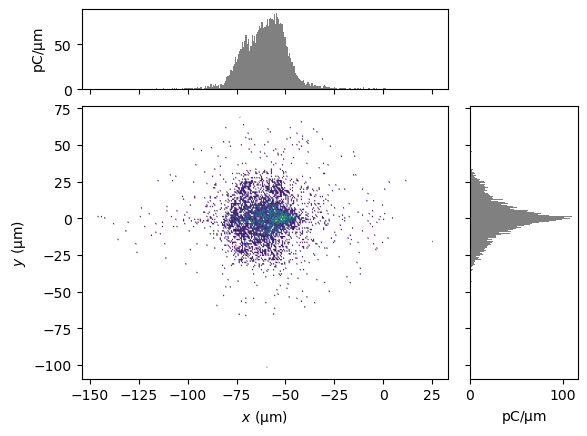

<Figure size 640x480 with 0 Axes>

In [8]:
P =  getBeamAtElement(tao, "PENT")

display(plotMod(P, 'x', 'y',  bins=300));
plt.clf()

# Change a magnet

In [9]:
setQuadkG(tao, "Q0FF", 0)
trackBeam(tao)

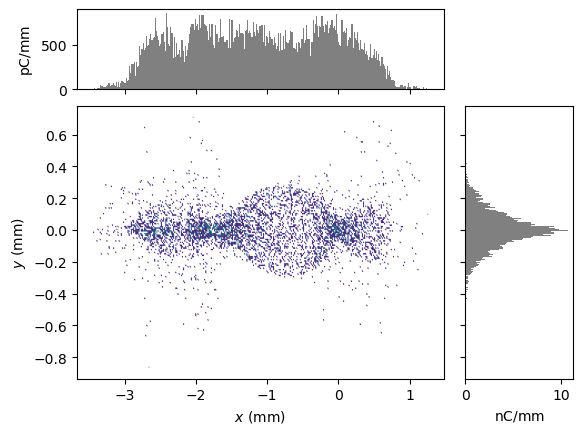

In [10]:
P =  getBeamAtElement(tao, "PENT")

display(plotMod(P, 'x', 'y',  bins=300));

# Change linac phase

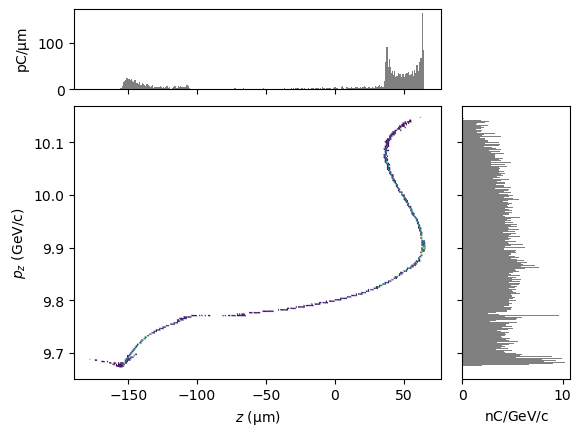

In [11]:
P =  getBeamAtElement(tao, "PENT")

display(plotMod(P, 'z', 'pz',  bins=300));

In [12]:
setLinacPhase(tao, "L2", -37)
trackBeam(tao)

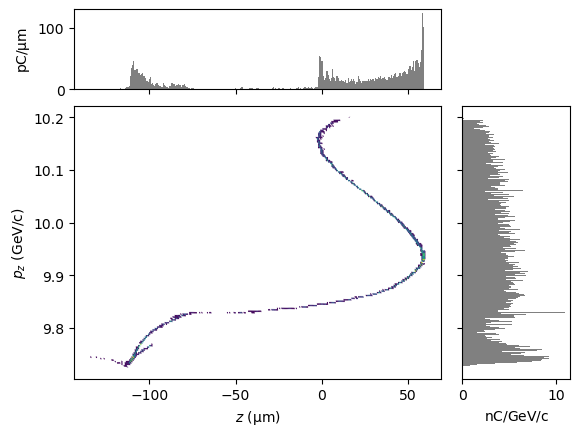

In [13]:
P =  getBeamAtElement(tao, "PENT")

display(plotMod(P, 'z', 'pz',  bins=300));